# Hands-on Machine Learning - Chapter 8 
# Dimensionality Reduction - Exercises

## Question 1 - Motivations for Dimensionality Reduction

### What are the main motivations for reducation a dataset's dimensionality? What are the main drawbacks?
#### Motivations
- **Time Complexity**: Primary underlying assumption is that data in high-dimensional space is not uniformly distributed. It changes very little along some axes, and is highly correlated along others. It makes little sense to retain all the input data for training when the same - or better - performance can be extracted using a subset of this higher dimensional feature space. This will often improve training time for a lot of machine learning models, whose time complexity often depends on the dimensionality of the feature space.
- **Space Complexity**: For the reasons discussed above, it is also beneficial to use dimensionality reduction to compress data so that it occupies less space on a device. 
- **Visualization**: Dimensionality reduction can help condense input feature spaces to 2 or 3 dimensions, which allows them to be plotted on graphs. Visual inspection of these graphs can often grant insights into the relationship or structure of the data which, in turn, can help inform feature engineering and model selection. 
- **Improve Model Performance**: Sometimes, not all input features are actually correlated with the target class. When in abundance, they can act as noise that prevents the model from learning real, ground-truth associations between I/O. Thus, in very few cases, dimensionality reduction can actually improve model performance (in terms of regression/classification error) by eliminating noise. 
- **Simplifying Machine Learning Task**: Also, the implicit assumption for dimensionality reduction is that the machine learning task becomes 'simpler' in lower dimensional space. However, this isn't always the case, and depends on the dataset.

#### Drawbacks
- **Loss of Information**: Dimensionality reduction is essentially compression. Like most compression techniques, the process isn't lossless: projection-based PCA, for instance, will often lose some data in terms of explained variance when transforming high-D data to low-D data. So original data lost through dimensionality reduction.
- **Pipeline Complexity**: Dimensionality reduction can also make machine learning pipelines more complex. 
- **Computationally Intensive**
- **Interpretability**: Transformed features can often be difficult to interpret.

## Question 2 - Curse of Dimensionality

### What is the curse of dimensionality? 
- Most real-world data is often very high dimensional.
- Data behaves very differently in high dimensions: the greater the dimensionality, the greater the chances that a given machine learning model will overfit the data.
- Number of training samples required to achieve uniform distribution of data points in higher dimensional space (so as to avoid overfitting) increases exponentially with feature space dimensionality. It simply isn't possible to find enough training instances to achieve the 'density' of samples required to avoid sparsity in higher-dimensional feature space.
- Sparsity is bad because a new test set example is likely to lie 'very far away' in the high-dimensional space from other training set examples on which models have been trained.
- This means that models trained on higher-dimensional data are usually not as robust as those trained on lower-dimensional data, and likely to overfit. 
- In high dimensional space, the likelihood that any given set of features is 'extreme' across any given axis is almost guaranteed, which means these samples are likely to skew the actual machine learning model trained with the data.

## Question 3 - Reversing Dimensionality Reduction

### Once a dataset's dimensionality has been reduced, is it possible to reverse the operation. If so, how? If not, why not?

It really depends on the dataset and the method being used for dimensionality reduction.

#### Possible when...
- Using singular value decomposition (as in PCA) and have access to all three constituent matrices $U, \Sigma, V_T$ returned by `svd` or a matrix of all principal components. In this case, original data can be recovered as a dot product: $dot(U, \Sigma, V_T)$, which is exactly what happens when we use `PCA`'s `inverse_transform`. 

#### Partially possible when
- the cumulative explained variance ratio of the principal components $\epsilon$ is $< 1.0$ i.e. not all principal components are available. If $\epsilon$ is high, then dimensionality reduction is still somewhat possible. 
- the dimensionality reduction uses a highly non-linear projection kernel such as an `RBF` kernel that maps the input space to an infinite-dimensional feature space before reducing this to a lower-dimensional feature space. Partial reconstruction is possible by finding the preimage of the points corresponding to the reduced dimensional space in the original `n`-dimensional feature space through a kernel trick mapping between the high dimensional feature space and `n`-dimensional space. 


#### Not possible when
- all principal component vectors are not available.
- kernel function for preimage is not available.

## Question 4 - PCA and Non-Linear Datasets

### Can PCA be used to reduce the dimensionality of a highly non-linear dataset?
- Yes. 
- Use a kernelized PCA instead of vanilla (linear) PCA.
- Uses a kernel trick to map `n`-dimensional space to very high dimensional feature space (possibly $\infty$-dimensional feature space) where the data is linearly projectable onto a `d`-dimensional, low-D reduced space.
- Kernel functions can transform non-linear datasets into linear datasets, and thus make linear projections possible. 

## Question 5 - Dimensions After PCA

### Suppose you perform PCA on a 1000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

- It really depends on the dataset. Can't say for sure how many dimensions the reduced feature space will have. 
- 95% variance could be preserved by as few as 1 feature in the 1000-dimensional space, or by as many as 999. Again, every dataset is different.
- What I can say for sure is that if 95% - rather than 100% - of the explained variance in the original dataset is accounted for, then `d` will always be lower than `n`.
- $d < 1000$.

## Question 6 - Use Cases

### In what cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

#### Vanilla PCA
- Linear (or near-linear) dataset. 
- Entire dataset can be fit into memory at once.

#### Incremental PCA
- Linear (or near-linear) dataset.
- Entire dataset cannot be fit into memory at once.
- Slower than vanilla PCA.
- Online learning. 

#### Randomized PCA
- When the dimensionality of the reduced space `d` is less than 80% either the dimensionality of original space `n` or the number of training examples `m`.
- Considerable reduction in dimensionality required.
- Data fits in memory.

#### Kernel PCA
- Highly non-linear dataset. 

## Question 7 - Evaluating Performance

### How can you evalaute the performance of a dimensionality reduction algorithm on your dataset?
- Dimensionality reduction works well if it eliminates a lot of dimensions from the dataset without losing too much information.
- One way of gauging this is to measure the reconstruction error between the original data and the data obtained by applying a reverse transformation to the reduced features. 
- If the dimensionality reduction is being done as a preprocessing step for a machine learning algorithm, the machine learning algorithm's loss (or other performance metric) can be used to gauge how good the dimensionality reduction algorithm was.
    - If the right dimensionality reduction algorithm was used, not a lot of information was lost.
    - If not a lot of information was lost, the algorithm should perform just as well when using the original dataset.

## Question 8 - Chaining Dimensionality Reduction

### Does it make any sense to chain two different dimensionality reduction algorithms?
- Yes, it makes sense to chain two different dimensionality reduction algorithms. 
- Different dimensionality reduction algorithms operate at different levels of granularity: some are very good at getting rid of lots of useless dimensions (e.g. PCA) while others are much better at local transformations (LLE).
- Common approach: apply PCA, then LLE. PCA quickly reduces a lot of dimensions, LLE takes less time to eliminate further dimensions, even though it is usually slower. 

## Question 9 - MNIST Time Complexity

**Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training and the remaining 10,000 for testing).**

In [5]:
from sklearn.datasets import fetch_openml

In [6]:
# Loading MNIST data as 784-dimensional vectors of pixel intensities
mnist = fetch_openml('mnist_784', version=1)

In [7]:
# Extracting features and labels
X = mnist['data']
y = mnist['target']

In [8]:
# Train-test split
X_train, y_train = mnist['data'][:60000], mnist['target'][:60000]
X_test, y_test = mnist['data'][60000:], mnist['target'][60000:]

**Train a Random Forest Classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.**

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

In [10]:
# Instantiate a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
# Time traing
t_start = time.time()
rf_clf.fit(X_train, y_train)
t_end = time.time()

Training time 41.11472702026367  seconds


In [13]:
# Print training time
print("Training Time: {:.2f}s".format(t_end - t_start))

Training Time: 41.11s


In [15]:
# Accuracy on the training set 
y_pred_train = rf_clf.predict(X_train)
print("Training Set Accuracy", accuracy_score(y_train, y_pred_train))

Training Set Accuracy 1.0


In [16]:
# Accuracy on the test set 
y_pred_test = rf_clf.predict(X_test)
print("Test Set Accuracy", accuracy_score(y_test, y_pred_test))

Test Set Accuracy 0.9705


**Next, use PCA to reduce the dataset's dimensionalty with an explained variance ratio of 95%**.

In [26]:
from sklearn.decomposition import PCA

In [27]:
# Instantiate a PCA object that will preserve 95% of explained variance in data
pca = PCA(n_components=0.95)

In [28]:
# Get the reduced data
X_train_reduced = pca.fit_transform(X_train)

**Train a new random forest classifier on the reduced datast and see how long it takes. Was training faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?**

In [29]:
# Instantiating a new random forest classifier - same estimators and random state
rf_clf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
# Fit to the reduced data
t_start = time.time()
rf_clf_reduced.fit(X_train_reduced, y_train)
t_end = time.time()

In [31]:
# Time taken for training on the reduced dataset
print("Training Time: {:.2f}".format(t_end - t_start))

Training Time: 97.73


In [32]:
# Evaluating on the training set
y_pred_train = rf_clf_reduced.predict(X_train_reduced)
print("Training Set Accuracy", accuracy_score(y_train, y_pred_train))

Training Set Accuracy 1.0


In [34]:
# Evaluation on the test set

# First, transform the test data so that it, too, has the same number of features as train data
X_test_reduced = pca.transform(X_test)

# Then predict
y_pred_test = rf_clf_reduced.predict(X_test_reduced)
print("Test Set Accuracy", accuracy_score(y_test, y_pred_test))

Test Set Accuracy 0.9481


### Comments
- I expected training time to decrease with the PCA. However, training time actually doubled!
- This is perhaps because the dimensionality reduction has made it 'harder' for the `RandomForestClassifier` to learn a decision boundary for the different classes of digits.
- This goes to show that there is no guarantee that using PCA will actually decrease training time: it really depends on the dataset, the machine learning algorithm used, and the model. 
- Training set accuracy is still 1.0, showing that this classifier is still overfitting the training set
- However, test set performance is lower than that on the original data, which is expected: even though we've preserved 95% variance in the training data, the 5% of missing variance is still information we lost. 
- **So in this case, the use of a random forest classifier with PCA has not been worthwhile: we increased our training time, and actually decreased our test set accuracy.**

**Does PCA work better with a different learning algorithm such as softmax `LogisticRegression`?**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Instantiate LogReg for fitting without PCA
log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Time fitting operation
t_start = time.time()
log_clf.fit(X_train, y_train)
t_end = time.time()

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [38]:
# Print training time
print("Training Took: {:.2f}s".format(t_end - t_start))

Training Took: 27.85s


Took less time to train than the random forest classifier.

In [39]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

Test set performance is not as good as the random forest classifier, but that is to be expected given that it took less time to train.

In [40]:
# LogReg with PCA
log_clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Time fitting operation - but now with 154-dimensional data
t_start = time.time()
log_clf2.fit(X_train_reduced, y_train)
t_end = time.time()

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [42]:
# Print training time 
print("Training Time: {:.2f}s".format(t_end - t_start))

Training Time: 7.74s


Using PCA on the dataset seems to have decreased softmax regression training time by more than 67%!

In [43]:
# How well does this perform on the test set?
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

A very small drop in performance compared to the non-PCA model, demonstrating that the softmax `LogisticRegressionClassifier` was a good choice to use for this PCA problem. While PCA did not improve accuracy score, it did decrease fitting time substantiailly, which is often preferable in real world problems.

## Question 10 - `t-SNE` with `MNIST`

**Use t-SNE to reduce the `MNIST` dataset down to two dimensions and plot the result using `matplotlib`.**

In [50]:
import numpy as np
np.random.seed(42)

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib as mpl

In [47]:
# Using only 10k training samples - otherwise dim reduction very slow
m = 10000

# Indexes of 10k randomly chosen samples 
idx = np.random.permutation(60000)[:m]

# Extract the corresponding targets and labels
X = mnist['data'][idx]
y = mnist['target'][idx]

In [48]:
# Instantiating T-SNE object that will compress data to 2-dimensions
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

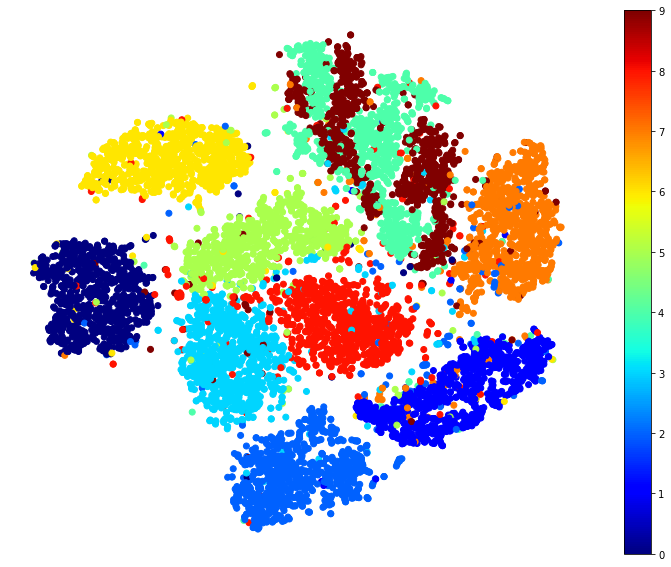

In [57]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.float32(y), cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

We can see from the graph that certain digits are very well separated e.g. 0, 6, and 8. Others, like 4s and 9s, 3s and 5s, are not very well-separated and tend to overlap.

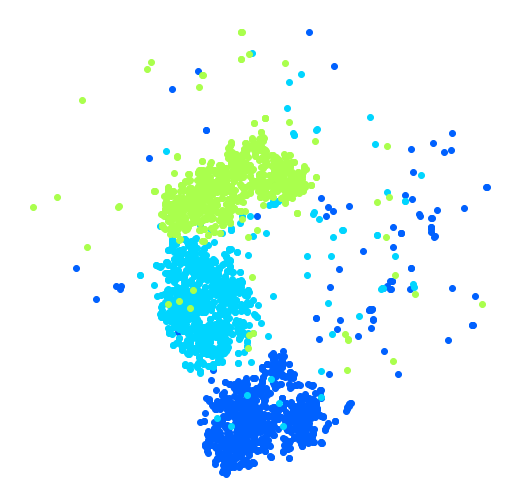

In [61]:
# Focusing only on the 3s and 5s
plt.figure(figsize=(9, 9))
cmap = mpl.cm.get_cmap('jet')

for digit in (2, 3, 5):
    plt.scatter(X_reduced[np.float32(y) == digit, 0],
               X_reduced[np.float32(y) == digit, 1], 
               c=[cmap(digit / 9)])
plt.axis('off')
plt.show()    

Running t-SNE on these three classes again. 

In [62]:
y_float = np.float32(y)
idx = (y_float == 2) | (y_float == 3) | (y_float == 5)

In [66]:
X_subset = X[idx]
y_subset = y_float[idx]

In [67]:
tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

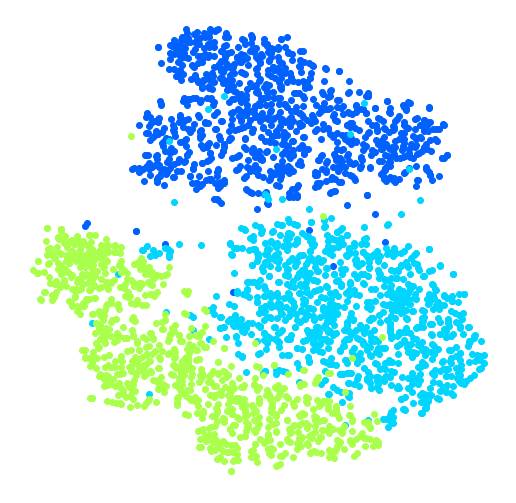

In [70]:
plt.figure(figsize=(9, 9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], 
               X_subset_reduced[y_subset == digit, 1], 
               c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [77]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

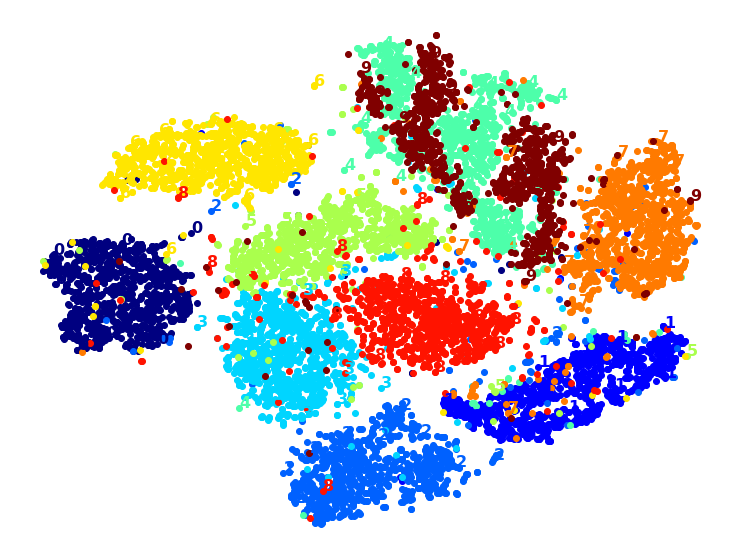

In [79]:
plot_digits(X_reduced, np.float32(y))

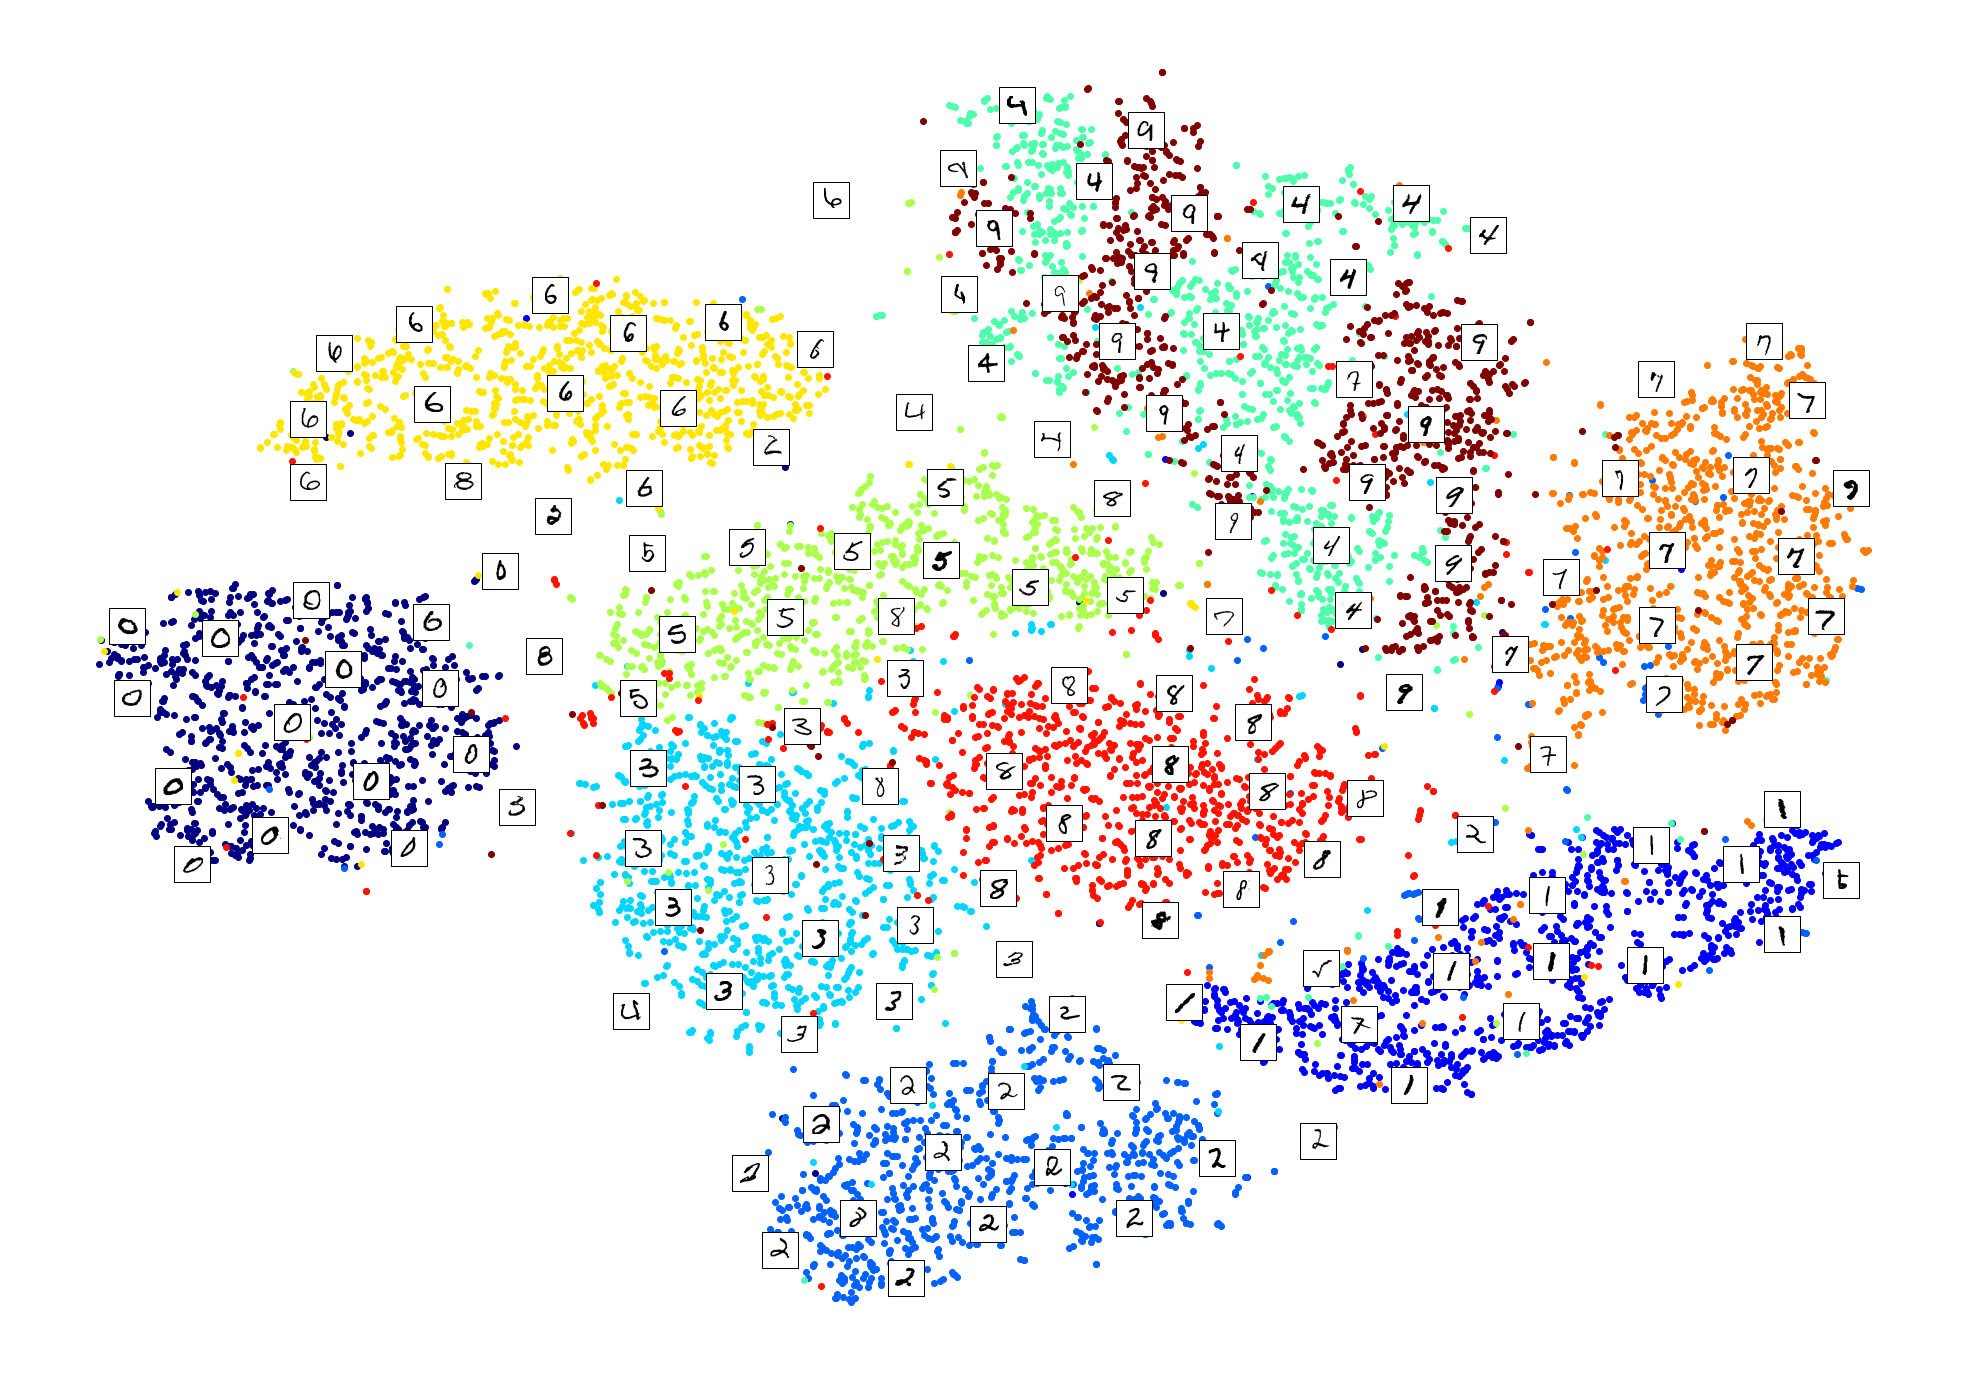

In [81]:
plot_digits(X_reduced, np.float32(y), images=X, figsize=(35, 25))

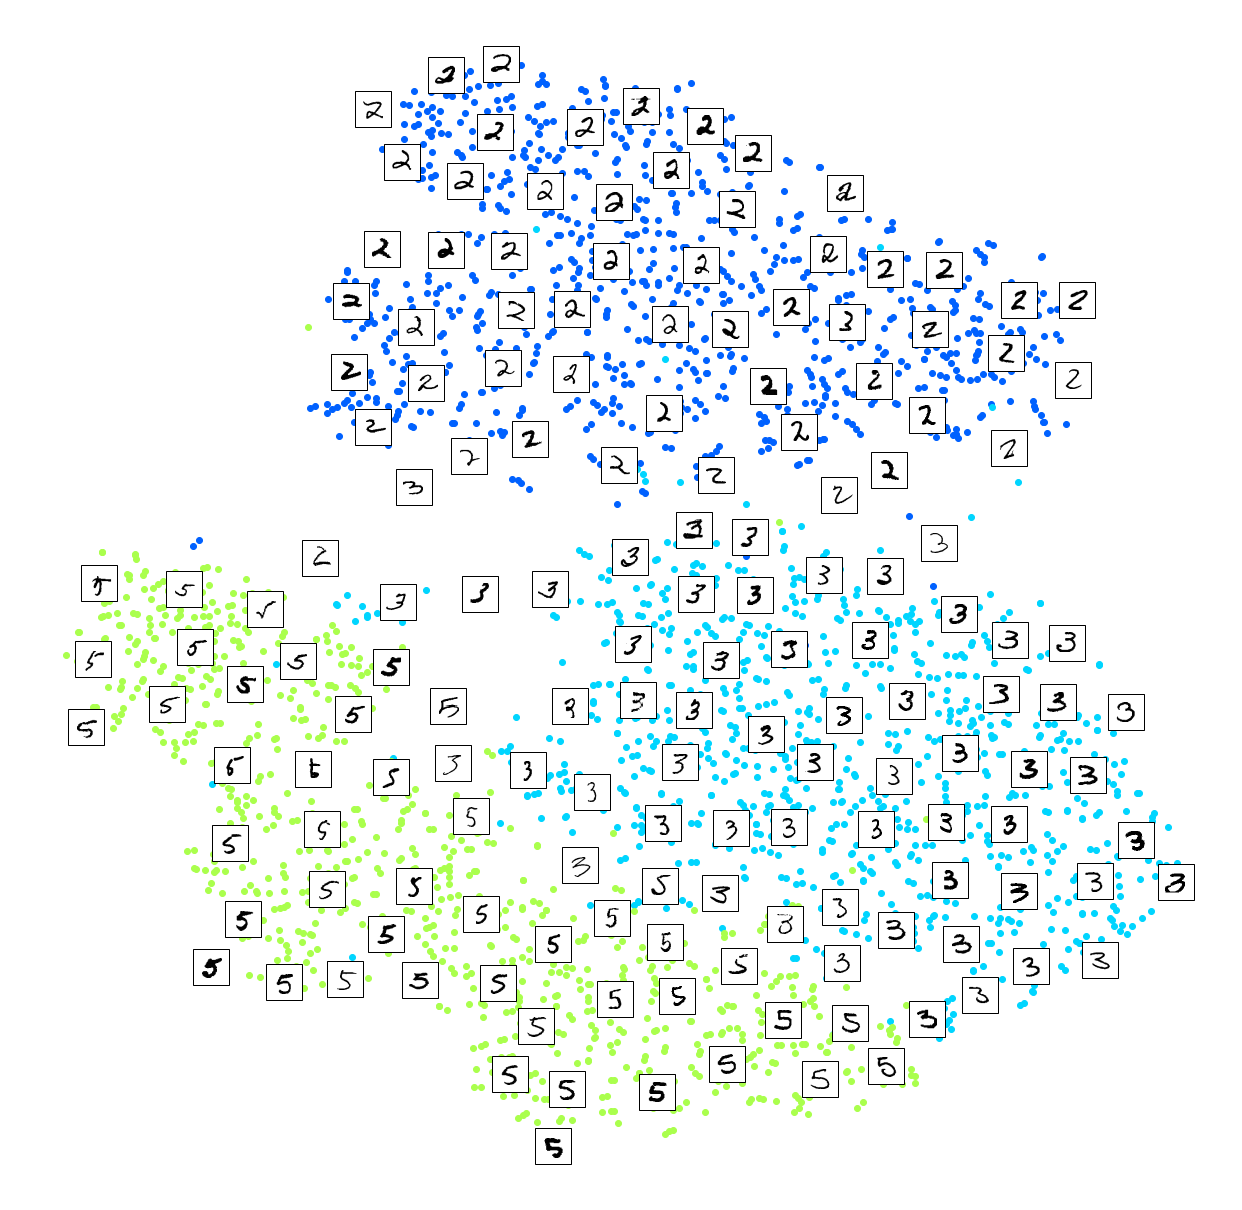

In [83]:
plot_digits(X_subset_reduced, np.float32(y_subset), images=X_subset, figsize=(22, 22))

## PCA

In [84]:
from sklearn.decomposition import PCA
import time

PCA took 0.5s


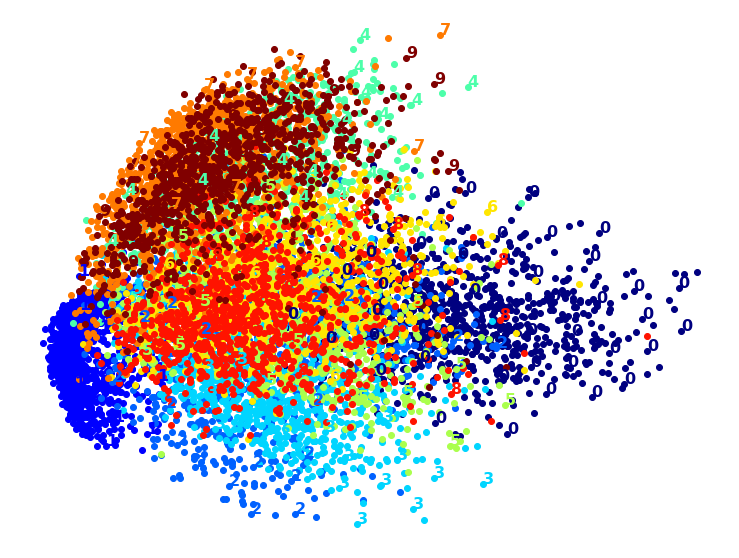

In [86]:
t_start = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t_end = time.time()
print("PCA took {:.1f}s".format(t_end - t_start))
plot_digits(X_pca_reduced, np.float32(y))
plt.show()

Very fast, but too much overlap.

## LLE

In [87]:
from sklearn.manifold import LocallyLinearEmbedding

LLE took: 138.7s


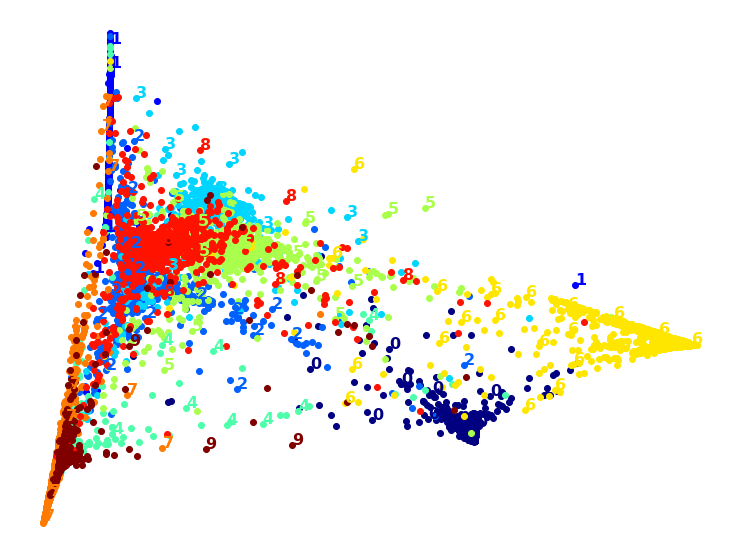

In [90]:
t_start = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t_end = time.time()
print("LLE took: {:.1f}s".format(t_end - t_start))
plot_digits(X_lle_reduced, np.float32(y))
plt.show()

This dimensionality reduction took a very long time, and the results aren't that great either. There is a lot of overlap between some clusters, although it does preserve intra-cluster spacing.

### PCA with 95% Variance + LLE

Common ML design pattern in dimensionality reduction is to use PCA to first quickly drop extra dimensions from data, and then apply LLE, which is much slower. This means LLE will now take a fraction of the time as the original dataset.

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
# First, quickly drop extra dimensions with PCA. Then slower dim reduction with LLE.
pca_lle = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('lle', LocallyLinearEmbedding(n_components=2, random_state=42)), 
])

PCA + LLE took: 45.13


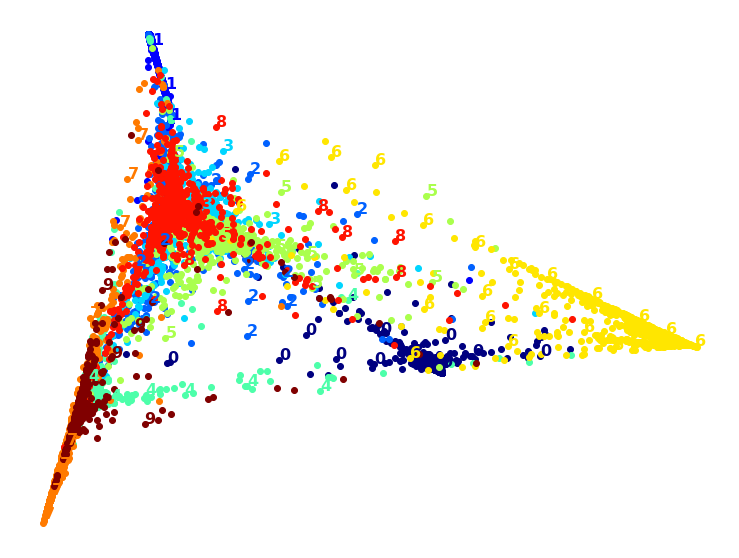

In [94]:
# How long does this take?
t_start = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t_end = time.time()
print("PCA + LLE took: {:.2f}".format(t_end - t_start))
plot_digits(X_pca_lle_reduced, np.float32(y))
plt.show()

Results are more or less the same, there are three main 'vertices' and the clusters still overlap. However, this method took much less time.

## MDS

Multi-dimensional scaling tries to reduce dimensionality while still trying to preserve the distances between the instances.

It is very slow to train, so we will use just 2,000 samples rather than the 1,0000 we have used for all other dimensionality reduction techniques.

In [95]:
from sklearn.manifold import MDS

In [96]:
m = 2000

MDS took 128.87s on 2000 MNIST images


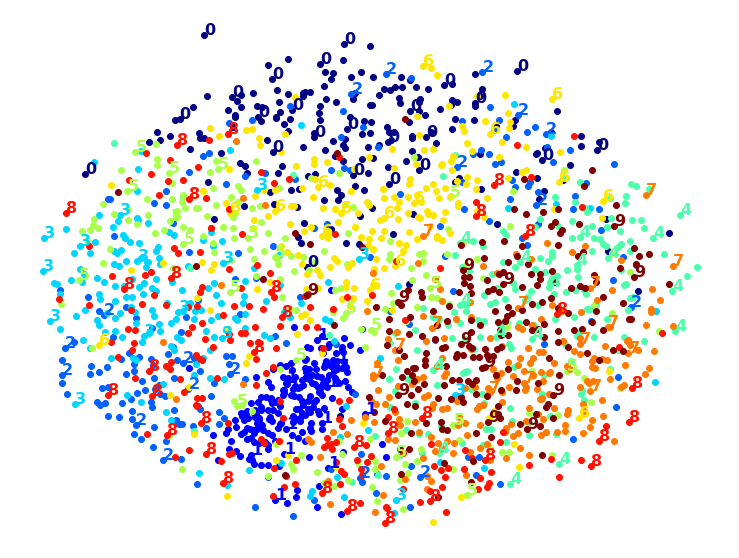

In [98]:
t_start = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t_end = time.time()
print("MDS took {:.2f}s on 2000 MNIST images".format(t_end - t_start))
plot_digits(X_mds_reduced, np.float32(y[:m]))
plt.show()

## PCA with MDS

There was a lot of overlap between clusters with MDS. Perhaps PCA can improve clustering, and maybe improve time complexity too?

In [100]:
from sklearn.pipeline import Pipeline

PCA + MDS took 126.42s


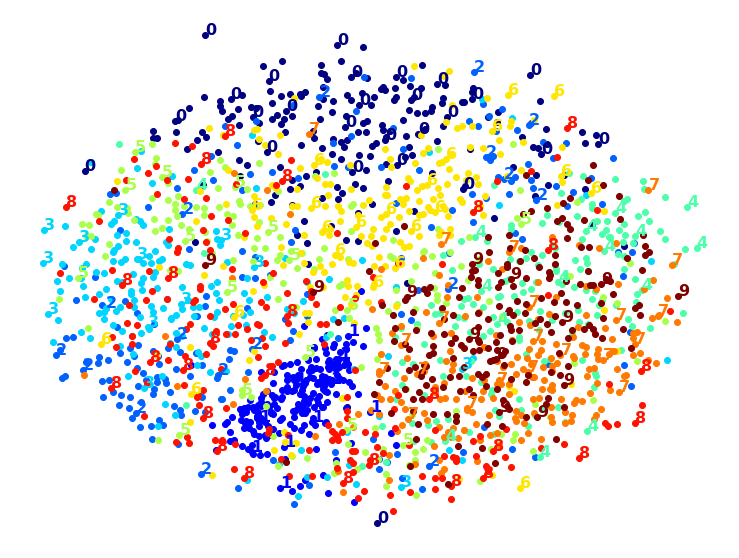

In [102]:
# Still fitting to 2k samples only 
m = 2000

# Pipeline will chain PCA with MDS
pca_mds = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('mds', MDS(n_components=2, random_state=42)),
])

# Time it 
t_start = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:m])
t_end = time.time()

print("PCA + MDS took {:.2f}s".format(t_end - t_start))
plot_digits(X_pca_mds_reduced, np.float32(y[:m]))
plt.show()

Practically no change in terms of fitting time or cluster overlap. So not a good choice.

## Linear Discriminant Analysis

In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA took: 2.36s


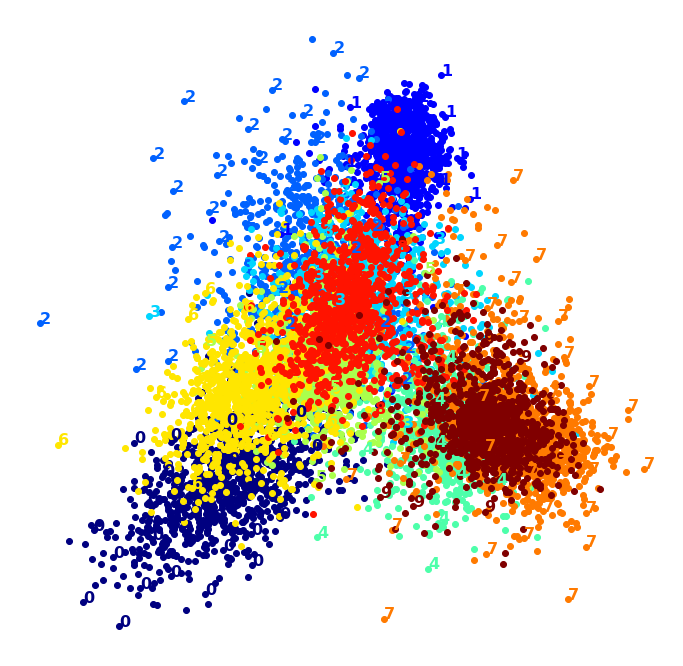

In [108]:
t_start = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t_end = time.time()
print("LDA took: {:.2f}s".format(t_end - t_start))
plot_digits(X_lda_reduced, np.float32(y), figsize=(12, 12))
plt.show()

## T-SNE

t-SNE took: 214.64s


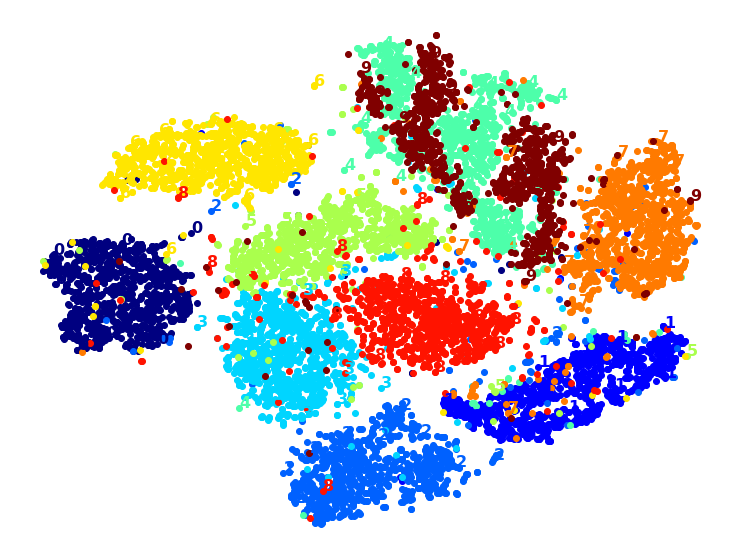

In [109]:
from sklearn.manifold import TSNE
t_start = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t_end = time.time()
print("t-SNE took: {:.2f}s".format(t_end - t_start))
plot_digits(X_tsne_reduced, np.float32(y))
plt.show()

## T-SNE  + PCA

In [110]:
pca_tsne = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)), 
    ('tsne', TSNE(n_components=2, random_state=42))
])

In [111]:
t_start = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t_end = time.time()

PCA + t-SNE took: 131.36s


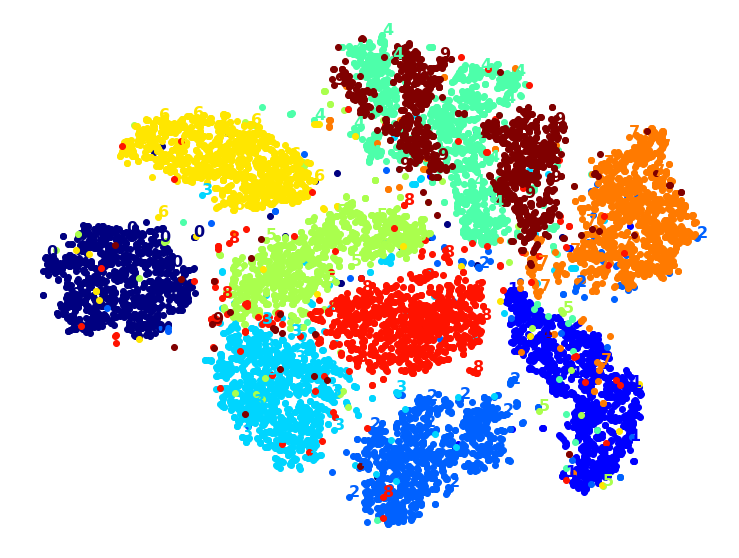

In [112]:
print("PCA + t-SNE took: {:.2f}s".format(t_end - t_start))
plot_digits(X_pca_tsne_reduced, np.float32(y))
plt.show()